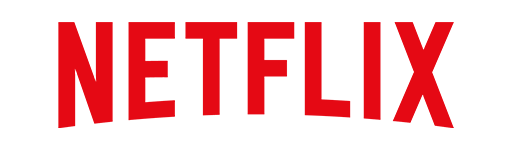

A Netflix é uma plataforma de streaming criada em 1997. A empresa tinha como foco inicial a locação de filmes. O modelo de streaming como conhecemos hoje, surgiu em 2007. Atualmente os assinantes pagam uma mensalidade e têm acesso a inúmeros títulos 24h por dia. Além da transmissão de séries e filmes de terceiros, desde 2013 a Netflix têm investido em conteúdos originais como The Crown, Ozark e House of Cards. 

A plataforma chegou ao Brasil em 2011 e atualmente possui inúmeras produções originais brasileiras como 3%, Coisa mais linda e Cidade Invisível. 

Este dataset disponível no [Kaggle](https://www.kaggle.com/shivamb/netflix-shows) apresenta uma lista com todos os filmes e seriados disponíveis na plataforma até o meio de 2021. 

Este projeto tem como objetivo explorar o dataset através de visualizações de dados utilizando a linguagem Python.

* ```show_id``` - número de id único para identificar o título
* ```type``` - tipo do título (filme ou tv show)
* ```title``` - nome do filme ou tv show
* ```director``` - nome do diretor
* ```cast``` - nome dos atores do elenco
* ```country``` - país de origem da produção
* ```date_added``` - data em que o título foi adicionado à plataforma
* ```release_year```- data de estréia do título
* ```rating``` - classificação indicativa
* ```duration``` - duração (minutos ou temporadas)
* ```listed_in``` - gênero do título
* ```description``` - descrição do título

## Bibliotecas e Carregando os dados

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore", category= FutureWarning)
%matplotlib inline

In [2]:
# Carregando o dataset

df = pd.read_csv('netflix_titles.csv', sep=',')

# Configurando a coluna date_added

df["date_added"] = pd.to_datetime(df['date_added'])

# Visualizando as primeiras linhas

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Tratamento de valores ausentes

In [3]:
# Verificando possíveis valores ausentes 

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print('{} null rate: {}%'.format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [4]:
# Substituindo valores nulos 

df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Retirando valores nulos

df.dropna(inplace=True)

# Retirando valores duplicados

df.drop_duplicates(inplace= True)

In [5]:
# Verificando valores ausentes 

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [6]:
# Obtendo informações sobre o tipo das variáveis do dataset

print("\nTamanho do dataset:")
print(f'Entradas: {df.shape[0]}')
print(f'Atributos: {df.shape[1]}')
df.dtypes


Tamanho do dataset:
Entradas: 7961
Atributos: 12


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

## Visualização dos dados 

###  1. Distribuição dos títulos em Filmes e Séries

Porcentagem da distribuição dos títulos nas categorias 'Movie' e 'TV Show'

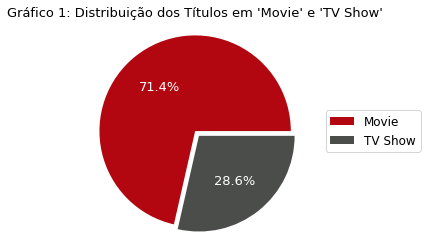

In [7]:
#Distribuição dos Títulos em 'Movie' e 'TV Show'

x=df.groupby(['type'])['type'].count()
colors=['#b20710','#4b4d4b']
x.plot(kind='pie', autopct="%1.1f%%", explode=[0,0.07], colors=colors, textprops=dict(color="w", size=13), radius=1.1)
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center left", borderaxespad=0, fontsize=12)
plt.title("Gráfico 1: Distribuição dos Títulos em 'Movie' e 'TV Show'", fontsize=13)
plt.axis('off');

O gráfico mostra que aproximadamente 71.4% dos títulos disponíveis na plataforma são filmes e 28.6% são programas de tv / seriados.

### 2. Distribuição dos títulos por País

Distribuição dos títulos por País. Qual o país de origem das produções disponíveis na plataforma ?

In [8]:
#Selecionando apenas o primeiro país listado

df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)

In [9]:
# Tabela de frequência absoluta e relativa da variável country

c_ab = df.groupby('first_country')['first_country'].count().sort_values(ascending=False)
c_rel = ((df.groupby('first_country')['first_country'].count())/df.shape[0]).sort_values(ascending =False)
ctable = pd.DataFrame((c_ab,c_rel*100), index=['total','(%)']).transpose().round(2)  

# Distribuição dos Países que apresentam mais produções na Netflix
print("\nTabela 1: Distribuição dos Países que apresentam mais produções na Netflix")
ctable


Tabela 1: Distribuição dos Países que apresentam mais produções na Netflix


,total,(%)
first_country,,
USA,3202.0,40.22
India,1008.0,12.66
UK,627.0,7.88
Canada,271.0,3.40
Japan,257.0,3.23
...,...,...
Namibia,1.0,0.01
Somalia,1.0,0.01
Slovenia,1.0,0.01


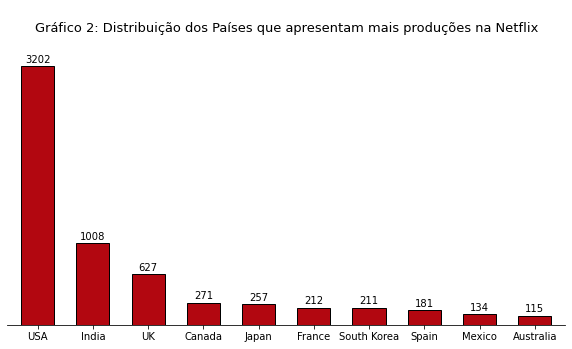

In [10]:
# Distribuição dos Países que apresentam mais produções na Netflix

fig,ax = plt.subplots(figsize=(10,5))
ax = c_ab.head(10).plot(kind='bar', width=0.6, color='#b20710', edgecolor='black')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title('\nGráfico 2: Distribuição dos Países que apresentam mais produções na Netflix\n',fontsize=13)
plt.xlabel('')
plt.xticks(rotation=0)
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

A tabela 1 e o Gráfico 2 mostram que a maioria das produções disponíveis na Netflix são de origem americana com 3202 títulos (40.22 %), com produções Indianas e Inglesas vindo logo atrás.

### 3. Distribuição dos títulos por Gênero 

Qual o gênero mais comum nos filmes disponíveis na plataforma ? E o gênero nos programas de tv/seriados ?
### 3.1. Categoria: Filme 

In [11]:
df['listed_in'] = df['listed_in'].str.split(', ')

In [12]:
df[['category1','category2', 'category3']] = pd.DataFrame(df.listed_in.tolist(),index= df.index)

In [13]:
netflix_categories_content = df[['type', 'category1','category2', 'category3']]
netflix_categories_content

,type,category1,category2,category3
0,Movie,Documentaries,None,None
1,TV Show,International TV Shows,TV Dramas,TV Mysteries
4,TV Show,International TV Shows,Romantic TV Shows,TV Comedies
7,Movie,Dramas,Independent Movies,International Movies
8,TV Show,British TV Shows,Reality TV,None
...,...,...,...,...
8801,Movie,Dramas,International Movies,Thrillers
8802,Movie,Cult Movies,Dramas,Thrillers
8804,Movie,Comedies,Horror Movies,None
8805,Movie,Children & Family Movies,Comedies,None


In [14]:
netflix_categories_group= pd.get_dummies(netflix_categories_content.set_index('type'), prefix='',prefix_sep='').stack().sum(level=[0,1])
netflix_categories_group

type                             
Movie    Action & Adventure          817.0
         Anime Features               63.0
         Anime Series                  0.0
         British TV Shows              0.0
         Children & Family Movies    535.0
                                     ...  
TV Show  Korean TV Shows             136.0
         Science & Nature TV          82.0
         TV Mysteries                 92.0
         TV Thrillers                 53.0
         Teen TV Shows                66.0
Length: 84, dtype: float64

In [15]:
# Número total de filmes por gênero

genre_movie = netflix_categories_group['Movie'].sort_values(ascending=False).head(10)
genre_movie_rel = (netflix_categories_group['Movie'].sort_values(ascending=False).head(10)/df.shape[0])
gmtable = pd.DataFrame((genre_movie,genre_movie_rel*100), index=['total','(%)']).transpose().round(2)                 

print('\nTabela 2: Número total de filmes por Gênero')
gmtable


Tabela 2: Número total de filmes por Gênero


,total,(%)
International Movies,2543.0,31.94
Dramas,2316.0,29.09
Comedies,1580.0,19.85
Action & Adventure,817.0,10.26
Documentaries,794.0,9.97
Independent Movies,745.0,9.36
Romantic Movies,588.0,7.39
Thrillers,549.0,6.90
Children & Family Movies,535.0,6.72
Horror Movies,340.0,4.27


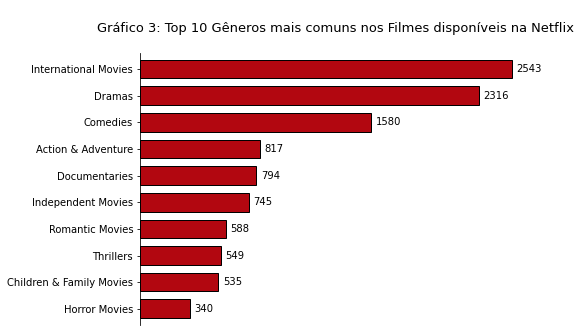

In [16]:
#Top 10 Gêneros mais comuns em filmes 


plt.figure(figsize=(7, 5))

ax = genre_movie.sort_values().plot(kind='barh', width=0.7, color='#b20710', edgecolor='black')

for p in ax.patches:
                _x = p.get_width() + float (30)
                _y = p.get_y() + p.get_height()/2
                value = int(p.get_width())
                ax.text(_x, _y, value, va='center')
                
plt.title('\nGráfico 3: Top 10 Gêneros mais comuns nos Filmes disponíveis na Netflix\n', fontsize=13)
plt.xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False);

Top 5 Gêneros mais comuns nos filmes disponíveis na Netflix

* 1º - Filmes Internacionais - 2543 títulos (31.94%)
* 2º - Drama - 2316	títulos (29.09%)
* 3º - Comédia - 1580 títulos (19.85 %)
* 4º - Ação e Aventura - 817 títulos (10.26%)
* 5º - Documentário - 794 títulos (9.97%)

### 3.2. Categoria: Programas de TV / Seriados 

In [17]:
# Número total de Programas de TV / Seriados por gênero

genre_tv = netflix_categories_group['TV Show'].sort_values(ascending=False).head(10)
genre_tv_rel = (netflix_categories_group['TV Show'].sort_values(ascending=False).head(10)/df.shape[0])
gtvtable = pd.DataFrame((genre_tv,genre_tv_rel*100), index=['total','(%)']).transpose().round(2)                 

print('\nTabela 3: Número total de Programas de TV / Seriados por Gênero')

gtvtable


Tabela 3: Número total de Programas de TV / Seriados por Gênero


,total,(%)
International TV Shows,1126.0,14.14
TV Dramas,662.0,8.32
TV Comedies,493.0,6.19
Crime TV Shows,420.0,5.28
Kids' TV,368.0,4.62
Docuseries,329.0,4.13
Romantic TV Shows,299.0,3.76
British TV Shows,236.0,2.96
Reality TV,205.0,2.58
Anime Series,152.0,1.91


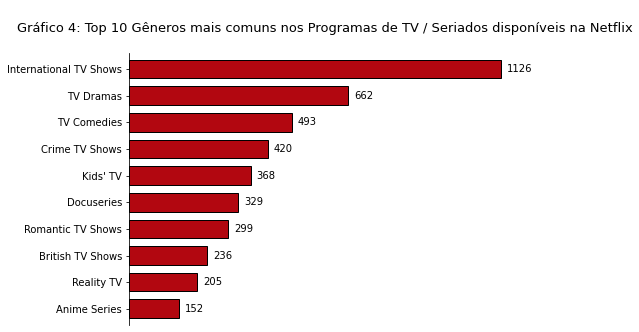

In [46]:
#Top 10 gêneros mais comuns nos Programas de TV / Seriados

plt.figure(figsize=(7, 5))
ax = genre_tv.sort_values().plot(kind='barh', width=0.7, color='#b20710', edgecolor='black')

for p in ax.patches:
                _x = p.get_width() + float (18)
                _y = p.get_y() + p.get_height()/2
                value = int(p.get_width())
                ax.text(_x, _y, value, va='center')
                
plt.title('\nGráfico 4: Top 10 Gêneros mais comuns nos Programas de TV / Seriados disponíveis na Netflix\n', fontsize=13)
plt.xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False);

Top 5 Gêneros mais comuns nos programas de tv / seriados disponíveis na Netflix

* 1º - Programas de TV Internacionais - 1126 títulos (14.14%)
* 2º - Drama - 662 títulos (8.32%)
* 3º - Comédia - 493 títulos (6.19%)
* 4º - Crime - 420 títulos (5.28%)
* 5º - Infantil - 368 títulos (4.62%)

### 4 . Tempo de Duração dos Filmes e Nº de temporadas dos Seriados
### 4.1. Categoria: Filme 

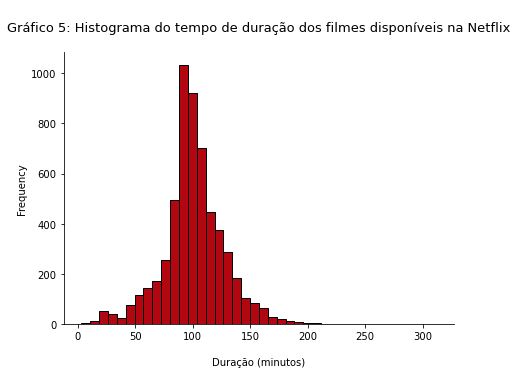

In [20]:
# Gráfico histograma com a frequência da duração dos filmes

movie_duration = df[df.type == 'Movie']['duration']

fig,ax = plt.subplots(figsize=(7,5))

movie_duration.plot(kind='hist', color='#b20710', edgecolor='black', bins=40)

plt.title('\nGráfico 5: Histograma do tempo de duração dos filmes disponíveis na Netflix\n', fontsize=13)
plt.xlabel('\nDuração (minutos)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

In [21]:
# Medidas descritivas da variável Duração em relação aos filmes disponíveis

print('\nTabela 4: Medidas descritivas da variável duração na categoria Filme')
movie_duration.describe().round(2)


Tabela 4: Medidas descritivas da variável duração na categoria Filme


count    5687.00
mean      100.52
std        27.12
min         3.00
25%        88.00
50%        99.00
75%       115.00
max       312.00
Name: duration, dtype: float64

Pela tabela 4 e o gráfico 5, observa-se que os filmes disponíveis na plataforma têm em média 100 minutos. O título com duração máxima tem 312 minutos e o título com duração mínima tem 3 minutos

#### Filme com maior duração na plataforma

In [22]:
df[df.type == 'Movie'].sort_values(by='duration', ascending=False).head(1)[['type','title','country','duration','release_year']]

,type,title,country,duration,release_year
4253,Movie,Black Mirror: Bandersnatch,United States,312,2018


O filme Black Mirror: Bandersnatch é um filme original Netflix e foi lançado em 2018. De acordo com o IMDB, o filme é do tipo interativo, tendo o telespectador a possibilidade de escolher para onde o enredo deve ir. Apesar de estar na plataforma com uma duração de 90 minutos, isso depende de como o telespectador decide assistir ao filme. O duração total incluindo todas as possíveis variações, com  5 finais diferentes, é de 5 horas 12 minutos e 13 segundos (512 minutos).

#### Filme com menor duração na plataforma

In [23]:
df[df.type == 'Movie'].sort_values(by='duration', ascending=False).tail(1)[['type','title','country','duration','release_year']]

,type,title,country,duration,release_year
3777,Movie,Silent,United States,3,2014


De acordo com o site IMDB, o filme Silent lançado em 2014, é um curta animação e tem 3 minutos de duração.

### 4.2. Categoria: Programas de TV / Seriados 

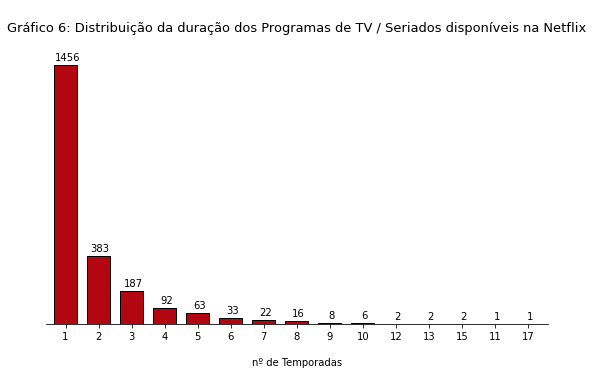

In [24]:
tv_duration = df[df.type == 'TV Show']['duration'].value_counts()

fig,ax = plt.subplots(figsize=(9,5))
ax= tv_duration.plot(kind='bar', width=0.7, color='#b20710', edgecolor='black')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+15),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title('\nGráfico 6: Distribuição da duração dos Programas de TV / Seriados disponíveis na Netflix\n', fontsize=13)
plt.xlabel('\nnº de Temporadas')
plt.xticks(rotation=0)
plt.ylabel('')
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

Pode-se observar pelo Gráfico 6 que em geral, os programas de TV / seriados disponíveis na Netflix possuem 1 temporada (1456 títulos). O programa de tv / seriado de maior duração apresenta 17 temporadas. 

#### Programas de TV / Seriados com maior duração na plataforma 

In [45]:
df[(df.duration > 12) & (df.type == 'TV Show')].sort_values(by='duration', ascending=False)[['type','title','duration','country']]

,type,title,duration,country
548,TV Show,Grey's Anatomy,17,United States
2423,TV Show,Supernatural,15,"United States, Canada"
4798,TV Show,NCIS,15,United States
1354,TV Show,Heartland,13,Canada
4220,TV Show,COMEDIANS of the world,13,United States


A série Grey's Anatomy foi lançada em 2005 e é o seriado de maior duração disponível na Netflix. Atualmente, a série está exibindo sua 18ª temporada. A plataforma disponibiliza no momento até a sua 17ª temporada.

Os programas Supernatural e NCIS aparecem logo em seguida com 15 temporadas. 

### 5. Classificação Indicativa

Classificação Indicativa - ClassInd - é uma informação prestada às famílias sobre a faixa etária para a qual obras audiovisuais não se recomendam. 

In [26]:
print('\nTabela 5: Classificação Indicativa por Categoria')

df.groupby(['rating','type'])['rating'].count().unstack().sort_values(by='Movie', ascending=False)


Tabela 5: Classificação Indicativa por Categoria


type,Movie,TV Show
rating,,
TV-MA,1924.0,1005.0
TV-14,1307.0,620.0
R,787.0,1.0
TV-PG,504.0,267.0
PG-13,482.0,NaN
PG,281.0,NaN
TV-G,109.0,81.0
TV-Y,84.0,143.0
TV-Y7,83.0,152.0


Algumas das classificações:

* TV-MA - Audiência Madura - Não recomendado para menores de 17 anos.
* TV-14 - Não recomendado para menores de 14 anos.
* R – Restricted – Permitido apenas com acompanhantes adultos para menores de 17 anos.
* PG e TV-PG – Parental Guidance Suggested – Sob acompanhamento/orientação dos pais.
* PG-13 - Parents Strongly Cautioned – Filme não recomendado para menores de 13 anos.
* TV-Y7 - Não recomendado para menores de 7 anos.
* TV-Y - Conteúdo Infantil.
* TV-Y7-FV - Não recomendado para menores de 7 anos com violência fantasiosa.
* G e TV-G – General Audiences – Livre para todas as idades.
* UR - Unrated - Sem Classificação

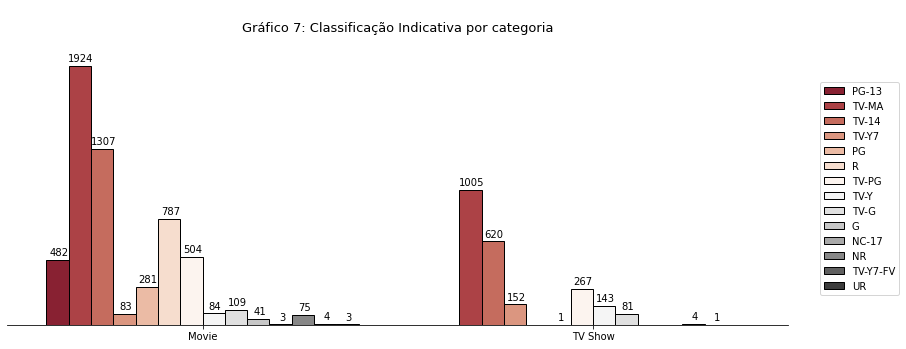

In [27]:
plt.figure(figsize=(14, 5))

palette = sns.set_palette('RdGy', 14)
    
ax = sns.countplot(x="type", hue="rating", palette=palette, data=df, edgecolor='black')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.032, p.get_height()+ 15),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title('\nGráfico 7: Classificação Indicativa por categoria\n', fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);
    


Pela Tabela 5 e o Gráfico 7, observa-se que a maioria dos títulos disponíveis na Netflix têm classificação indicativa TV-MA, ou seja, não recomendado para menores de 17 anos. Logo seguida vêm os títulos classificados como TV-14 (não recomendado para menores de 14 anos.

* TV-MA - 1924 filmes e 1005 programas de tv/seriados
* TV-14 - 1307 filmes e 620 programas de tv/seriados

### 6. Títulos adicionados na plataforma 

In [39]:
# Criando as colunas year_added e date_added

df['year_added'] = df['date_added'].dt.year.astype(int)
df['month_added'] = df['date_added'].dt.month.astype(int)

In [30]:
year_type = df.groupby(['year_added','type'])['year_added'].count().unstack().sort_values(by='year_added', ascending = False)

print('\nTabela 6: Total de títulos adicionados na plataforma por ano')

year_type


Tabela 6: Total de títulos adicionados na plataforma por ano


type,Movie,TV Show
year_added,,
2021,770.0,370.0
2020,1223.0,548.0
2019,1349.0,509.0
2018,1192.0,337.0
2017,812.0,309.0
2016,242.0,165.0
2015,54.0,25.0
2014,19.0,5.0
2013,6.0,5.0


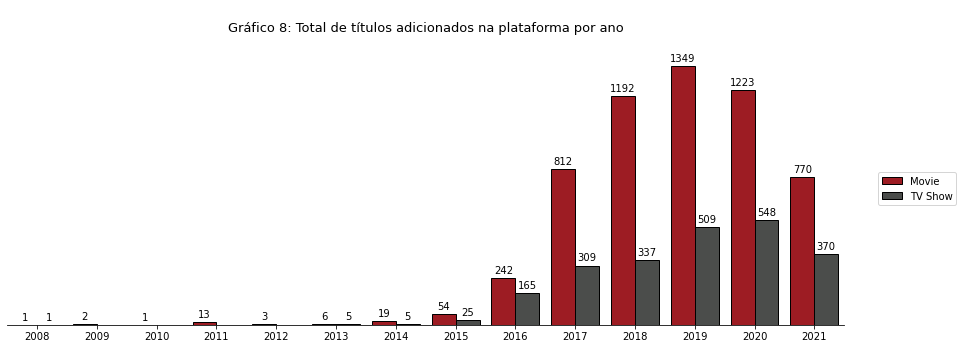

In [31]:
plt.figure(figsize=(15, 5))

colors=['#b20710','#4b4d4b']
ax = sns.countplot(x='year_added', data=df, hue='type', palette=colors, edgecolor='black')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height() + 12),
                    ha='center', va='bottom',
                    color= 'black')

plt.title('\nGráfico 8: Total de títulos adicionados na plataforma por ano\n', fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0);

Pode-se observar pela Tabela 6 e Gráfico 8 uma crescente no nº de títulos adicionados na plataforma entre 2016 e 2021. Destaca-se o ano de 2019 com 1349 filmes adicionados e 509 programas de tv / seriados.

### 7. Últimos lançamentos adicionados na plataforma

Alguns dos lançamentos mais recentes na plataforma de produções americanas e brasileiras

### 7.1. Categoria: Filme 

In [40]:
print('\nTabela 7: Filmes Americanos adicionados recentemente na Netflix')
df[(df.country == 'United States') & (df.type == 'Movie')].sort_values(by=['release_year','month_added'], ascending=False).head(10)[['type','title','country','date_added','release_year']]


Tabela 7: Filmes Americanos adicionados recentemente na Netflix


,type,title,country,date_added,release_year
9,Movie,The Starling,United States,2021-09-24,2021
81,Movie,Kate,United States,2021-09-10,2021
101,Movie,Untold: Breaking Point,United States,2021-09-07,2021
231,Movie,The Water Man,United States,2021-08-25,2021
247,Movie,Sweet Girl,United States,2021-08-20,2021
290,Movie,Untold: Malice at the Palace,United States,2021-08-10,2021
295,Movie,The Paper Tigers,United States,2021-08-07,2021
307,Movie,Aftermath,United States,2021-08-04,2021
317,Movie,Pray Away,United States,2021-08-03,2021
437,Movie,Cosmic Sin,United States,2021-07-17,2021


In [41]:
print('\nTabela 8: Filmes Brasileiros adicionados recentemente na Netflix')
df[(df.country == 'Brazil') & (df.type == 'Movie')].sort_values(by=['release_year','month_added'], ascending=False).head(10)[['type','title','country','date_added','release_year']]


Tabela 8: Filmes Brasileiros adicionados recentemente na Netflix


,type,title,country,date_added,release_year
783,Movie,Carnaval,Brazil,2021-06-02,2021
966,Movie,Get the Grift,Brazil,2021-04-28,2021
1188,Movie,Get the Goat,Brazil,2021-03-18,2021
1577,Movie,Emicida: AmarElo - It’s All For Yesterday,Brazil,2020-12-08,2020
1601,Movie,Just Another Christmas,Brazil,2020-12-03,2020
1704,Movie,The Beginning of Life 2: Outside,Brazil,2020-11-13,2020
2050,Movie,Afonso Padilha: Classless,Brazil,2020-09-03,2020
2302,Movie,Thiago Ventura: POKAS,Brazil,2020-07-02,2020
2563,Movie,Luccas Neto em: Acampamento de Férias 2,Brazil,2020-05-04,2020
2601,Movie,Rich in Love,Brazil,2020-04-30,2020


### 7.2. Categoria: Programas de TV / Seriados 

In [42]:
print('\nTabela 9: Programas de TV / Seriados Americanos adicionados recentemente na Netflix')
df[(df.country == 'United States') & (df.type == 'TV Show')].sort_values(by=['release_year','month_added'], ascending=False).head(10)[['type','title','country','date_added','release_year']]


Tabela 9: Programas de TV / Seriados Americanos adicionados recentemente na Netflix


,type,title,country,date_added,release_year
15,TV Show,Dear White People,United States,2021-09-22,2021
40,TV Show,He-Man and the Masters of the Universe,United States,2021-09-16,2021
55,TV Show,Nailed It,United States,2021-09-15,2021
82,TV Show,Lucifer,United States,2021-09-10,2021
97,TV Show,Kid Cosmic,United States,2021-09-07,2021
106,TV Show,Bunk'd,United States,2021-09-05,2021
125,TV Show,Q-Force,United States,2021-09-02,2021
184,TV Show,Sparking Joy,United States,2021-08-31,2021
220,TV Show,Family Reunion,United States,2021-08-26,2021
241,TV Show,Manifest,United States,2021-08-21,2021


In [43]:
print('\nTabela 10: Programas de TV / Seriados Brasileiros adicionados recentemente na Netflix')
df[(df.country == 'Brazil') & (df.type == 'TV Show')].sort_values(by=['release_year','month_added'], ascending=False).head(10)[['type','title','country','date_added','release_year']]


Tabela 10: Programas de TV / Seriados Brasileiros adicionados recentemente na Netflix


,type,title,country,date_added,release_year
1339,TV Show,Invisible City,Brazil,2021-02-05,2021
1532,TV Show,Anitta: Made In Honório,Brazil,2020-12-16,2020
1715,TV Show,A Queen Is Born,Brazil,2020-11-11,2020
1910,TV Show,"Good Morning, Verônica",Brazil,2020-10-01,2020
2127,TV Show,3%,Brazil,2020-08-14,2020
2168,TV Show,Mystery Lab,Brazil,2020-08-04,2020
2230,TV Show,Kissing Game,Brazil,2020-07-17,2020
2245,TV Show,Dating Around: Brazil,Brazil,2020-07-10,2020
2359,TV Show,Most Beautiful Thing,Brazil,2020-06-19,2020
2409,TV Show,Reality Z,Brazil,2020-06-10,2020


### 8. Títulos mais antigos disponíveis na plataforma

### 8.1. Categoria: Filme 

In [44]:
print('\nTabela 11: Top 5 Filmes mais antigos disponível na Netflix')
df[df.type == 'Movie'].sort_values(by='release_year', ascending=True).head(5)[['type','title','country','date_added','release_year']]


Tabela 11: Top 5 Filmes mais antigos disponível na Netflix


,type,title,country,date_added,release_year
8205,Movie,The Battle of Midway,United States,2017-03-31,1942
7790,Movie,Prelude to War,United States,2017-03-31,1942
8763,Movie,WWII: Report from the Aleutians,United States,2017-03-31,1943
8739,Movie,Why We Fight: The Battle of Russia,United States,2017-03-31,1943
8660,Movie,Undercover: How to Operate Behind Enemy Lines,United States,2017-03-31,1943


Os filmes mais antigos disponíveis na plataforma são 'The Battle of Midway' e 'Prelude to War' de 1942.

### 8.2. Categoria: Programas de TV / Seriados 

In [37]:
print('\nTabela 12: Top 5 Programas de TV / Seriados mais antigos disponível na Netflix')
df[df.type == 'TV Show'].sort_values(by='release_year', ascending=True).head(5)[['type','title','country','date_added','release_year']]


Tabela 12: Top 5 Programas de TV / Seriados mais antigos disponível na Netflix


,type,title,country,date_added,release_year
1331,TV Show,Five Came Back: The Reference Films,United States,2021-02-09,1945
7743,TV Show,Pioneers of African-American Cinema,United States,2017-02-01,1946
8541,TV Show,The Twilight Zone (Original Series),United States,2017-07-01,1963
8189,TV Show,The Andy Griffith Show,United States,2017-07-01,1967
4550,TV Show,Monty Python's Fliegender Zirkus,"United Kingdom, West Germany",2018-10-02,1972


O programa de tv / seriado mais antigo disponível na Netflix é o 'Five Came Back: The Reference Films' de 1945. De acordo com o resumo encontrado na plataforma, a série documental discute os filmes de propaganda da Segunda Guerra Mundial.	

### 9. WordCloud

O wordcloud é uma apresentação visual que mostra as palavras que apareceram com maior frequência na variável ```title```.

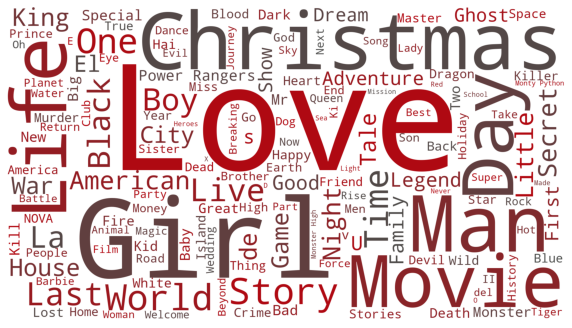

In [38]:
# WordCloud da Variável Title

from wordcloud import WordCloud

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#b20710','#4b4d4b'])

plt.subplots(figsize=(10,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080,
                          colormap=cmap, max_words=150
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

De acordo com o wordcloud algumas palavras se destacaram nos nomes dos filmes e séries disponíveis na Netflix. Algumas das palavras que apareceram com maior frequência: Love, Christmas, World, Life, City, Time e Story.